# An instruction of how to use the repo

In [ ]:
!conda create -n qec python=3.10 numpy scipy matplotlib pandas
!conda activate qec

Channels:
 - 
Platform: linux-64
Solving environment: failed

PackagesNotFoundError: The following packages are missing from the target environment:

  - llvmlite



CondaError: Run 'conda init' before 'conda activate'



## Important !

Before installing anything else, we need to install cuda and pytorch=2.6.0; This depends on the gpu and the operation system. See [[https://pytorch.org/get-started/locally/]] for torch and [[https://docs.nvidia.com/cuda/]] for cuda

## pip libraries:

In [3]:

!pip install torch==2.6.0 
!pip install torch-geometric
!pip install gpytorch botorch ax pymatching pymoo qecsim qldpc
!pip install toponetx topomodelx topoembedx
!pip install qiskit stim sinter
!pip install ldpc bposd
!pip install pymoo





  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.15.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
Using cached scipy-1.15.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
karateclub 1.3.3 requires numpy<

If you have installed all the packages, please try to run this in the new environment:

In [ ]:
import random
import numpy as np
import torch
from code_construction.code_construction import CodeConstructor
from bayesian_optimization.objective_function import ObjectiveFunction
from bayesian_optimization.encoder import *
from bayesian_optimization.chaincomplexembedding import *
from bayesian_optimization.gp import *
import gpytorch
from gpytorch.mlls import ExactMarginalLogLikelihood
from gpytorch.distributions import MultivariateNormal
from gpytorch.kernels import RBFKernel, MaternKernel, SpectralMixtureKernel, ScaleKernel
import copy
from typing import Dict, Optional, Tuple, Any, List

import torch
import gpytorch
from gpytorch.mlls import ExactMarginalLogLikelihood
from torch.nn.utils import clip_grad_norm_
import math
from dataclasses import dataclass, asdict
from typing import Tuple, Union, Dict, Any

from torch.distributions.normal import Normal
from bayesian_optimization.bo import BO_on_QEC
import pymoo

## The instructions of how to run the file

Type following command in the terminal:
`python BOplayground.py 42 0`

the first argv is the random seed 
the second argv is the index of the initial points datasets

## Read & plot the results

#### Reading the results of BO/EA/RS:


In [ ]:
import pickle
from code_construction.code_construction import CodeConstructor
l=12
g=6
dataset_index = 0
seed = 1
filename = f'./data/BO_results/BO_{l}_{g}_{dataset_index}_{seed}.pkl' # if you want to read the EA/RS results, place replace the prefix 'BO' to 'EA' or 'RS'

best_known_y = -0.00693 # The objective function of [[144,26]] code. 
with open(filename,'rs') as f:
    data = pickle.load(f)
    flat = data['evaluation_history'] # this is used to plot the best-so-far curve
    best_y = data['best_y'] # if this is better than the best know found code, we could replace the results in figure 7 and 9. 
    best_x = data['best_x']
    if best_y >= best_known_y:
        codeconstructor = CodeConstructor(method='bb',para_dict={'l':l,'g':g})
        c = codeconstructor.construct(best_x)
        k = c.k
        print(f'This [[144,{k}]] code is better')
    

#### The data of figure 7; figure 8; figure 9

Figure 7
x axis: physical error rate
y axis: word error rate

gross code vs [[72,12,6]] BB code vs [[144,26]] BB code (our result)

In [ ]:
pp_list = [0.05, 0.040036870145840404, 0.032059019421497734, 0.0256708559516296, 0.020555614525359374, 0.01645964939039528, 0.013179856905786339, 0.010553604389554513, 0.008450665770303305, 0.0067667641618306355]
# [144,26]
code_144_26= [0.011445891946481712, 0.005810775130175694, 0.0028562211382342495, 0.0015016991653288292, 0.0007955535034166461, 0.00042144348451766955, 0.00023259809361952932, 0.00016032087308970322, 0.00012056614268329824, 4.5025331880887975e-05]
gross = [0.004941267916952596, 0.002594195977199232, 0.001366896217540714, 0.0007455495580136473, 0.0003992086896752456, 0.00020857243058891584, 9.588388262971037e-05, 5.585048616230104e-05, 2.5837004546613862e-05, 2.083572086741814e-05]
code_72_12_6=[0.010151361651358104, 0.0050821776826791565, 0.0025933384934497816, 0.0013330638587575327, 0.0006506567387046802, 0.00036238808305733006, 0.00018184843515745008, 0.00011340403922088793, 5.5016644518901536e-05, 1.8335182204287648e-05]

Figure 8
x axis: physical error rate
y axis: word error rate

gross code vs [[144,8]] BB code (our result)

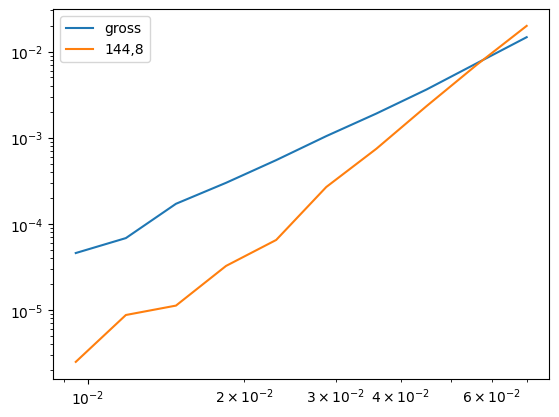

In [ ]:
pp_list = [0.07, 0.05605161820417657, 0.04488262719009683, 0.035939198332281444, 0.028777860335503124, 0.02304350914655339, 0.018451799668100875, 0.014775046145376319, 0.011830932078424629, 0.00947346982656289]
gross = [0.01468388594008141, 0.00730116936108316, 0.003624729974722629, 0.001908233950801752, 0.0010434677566117934, 0.0005491556129465502, 0.00029966005248871497, 0.00017099405602716278, 6.835902874036126e-05, 4.584489121428614e-05]
code_144_8 = [0.01986802811443611, 0.00698988488192942, 0.0023225422652949357, 0.0007444367661358919, 0.0002677507823637404, 6.50147923076938e-05, 3.2503697475871896e-05, 1.125044299365996e-05, 8.75026798052847e-06, 2.5000218752957437e-06]
# These data was calculated from 100_000 Monte-Carlo decodings, the standard error will be sqrt(wer(1-wer)/100_000)
import matplotlib.pyplot as plt
plt.plot(pp_list,gross,label='gross')
plt.plot(pp_list,code_144_8,label='144,8')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

Figure 9
x axis: Code rate (k/n)
y axis: psuedo t/n




In [ ]:
l = 12
g = 6
para_dict = {'l':l,'g':g}
code_class = 'bb'
import numpy as np
from code_construction.code_construction import CodeConstructor
code_constructor = CodeConstructor(method=code_class,para_dict = para_dict)
x = [0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.] # Let x be the best_x we have
c = code_constructor.construct(x)
psuedo_t = ObjectiveFunction(code_constructor, pp=pp,decoder_param={'trail': 100000}).psuedo_t

# this function is used to calculate psuedo_t
print(psuedo_t(c))
# code rate k/n
print(c.k/144)

In [ ]:
# The psuedo t/n for rotated surface codes:
# 3*3surface code, psuedo t:1.240409037092388
# 5*5surface code, psuedo t:3.168288067483846
# 7*7surface code, psuedo t:5.806713473577745
# 9*9surface code, psuedo t:9.007246610022946
# 11*11surface code, psuedo t:12.741790221308744
# 13*13surface code, psuedo t:17.228540816991853
# 15*15surface code, psuedo t:22.092362338524666
dis = [3,5,7,9,11,13,15]
code_rates = [1/i**2 for i in dis]
surfacecodes_psuedot = [1.240409037092388,3.168288067483846,5.806713473577745,9.007246610022946,12.741790221308744,17.228540816991853,22.092362338524666]

# plt.scatter([26/144],[8.280255381569452/144],color='#f77a66',label='[[144,26]] bb code we discoverd')
# plt.scatter([8/144],[11.450956649650138/144],color="#f7f766",label='[[144,8]] bb code we discoverd')
# plt.scatter([12/144],[11.007987466683774/144],color='#5380fc',label='[[144,12,12]] bb code')
# plt.scatter([12/72],[5.339159889497246/144],color='#92D579',label='[[72,12,6]] bb code')
# plt.scatter([1/9,1/25,1/49,1/81,1/121,1/169,1/225],[1.240409037092388/9,3.168288067483846/25,5.806713473577745/49,9.007246610022946/81,12.741790221308744/121,17.228540816991853/169,22.092362338524666/225],color="#B15AEA",label='distance 3-15 Rotated surface codes')

n=144 non-degenerate CSS Hamming bound: code rates:[0.7847222222222222, 0.7430555555555556, 0.7013888888888888, 0.6597222222222222, 0.6180555555555556, 0.5833333333333334, 0.5416666666666666, 0.5069444444444444, 0.4722222222222222, 0.4375, 0.4027777777777778, 0.3680555555555556, 0.3402777777777778, 0.3055555555555556, 0.2777777777777778, 0.25, 0.2152777777777778, 0.1875, 0.1597222222222222, 0.13194444444444445, 0.10416666666666667, 0.0763888888888889, 0.05555555555555555, 0.027777777777777776, 0.0], psuedo t//n:[0.034722222222222224, 0.041666666666666664, 0.04861111111111111, 0.05555555555555555, 0.0625, 0.06944444444444445, 0.0763888888888889, 0.08333333333333333, 0.09027777777777778, 0.09722222222222222, 0.10416666666666667, 0.1111111111111111, 0.11805555555555555, 0.125, 0.13194444444444445, 0.1388888888888889, 0.14583333333333334, 0.1527777777777778, 0.1597222222222222, 0.16666666666666666, 0.1736111111111111, 0.18055555555555555, 0.1875, 0.19444444444444445, 0.2013888888888889]
n=

/tmp/ipykernel_340170/1970098735.py:13: RuntimeWarning: overflow encountered in multiply
  s += comb(n, i)* (3**i)


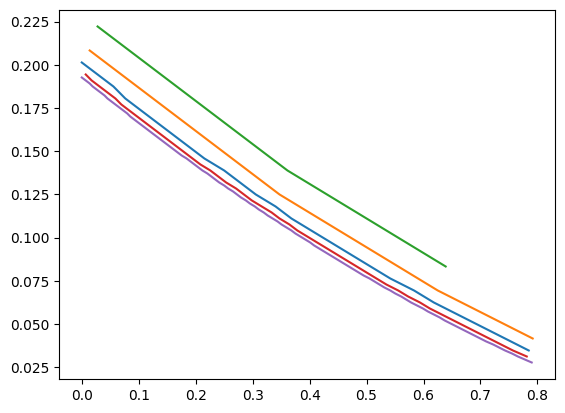

In [1]:
# This is used to plot the non-degenerate Hamming bound in the psuedo_t vs code rate view.
from scipy.special import comb
import numpy as np
import matplotlib.pyplot as plt
def binomial_probability(n,d_e,p_p):
        return comb(n, d_e) * (p_p ** d_e) * ((1 - p_p) ** (n - d_e))
def code_rate_delta(t,n = 144):
    # t = int(delta*n / 2)
    t = int(t)
    delta = (2*t+1)
    s = 0
    for i in range(t):
        s += comb(n, i)* (3**i)
    k = np.floor(n - np.log2(s))
    
    CR = k/n

    return CR
for n in [144,72,36,288,576]:
    CR = []
    Delta = []
    for t in range(1,n//2):
        cr = code_rate_delta(t,n)
        if cr>=0 and cr<=0.8:
            CR.append(cr)
            Delta.append(t/n)
    plt.plot(CR,Delta,label=f'n={n} Non-degenerate CSS Code Hamming Bound')
    print(f'n={n} non-degenerate CSS Hamming bound: code rates:{CR}, psuedo t//n:{Delta}')
plt.show()